In [150]:
%run Algorithms.ipynb


In [135]:
def write_results_to_file(filename, results):
    with open(filename, 'w') as f:
        for result in results:
            f.write(f"{result}\n")

In [136]:
def evaluate_algorithm(name,algname,algorithm, G, *args, **kwargs):
    start_time = time.time()
    best_solution, best_cost, cost_progress = algorithm(G, *args, **kwargs)
    end_time = time.time()
    execution_time = end_time - start_time
    
    print("Graph:", G, f"Minimum Vertex Cover found ({name}_{algname}):", best_solution)
    print("Number of Vertices in Cover:", best_cost, f"Execution Time: {execution_time:.4f} seconds\n\n")

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    pos = nx.spring_layout(G)
    node_colors = ['red' if best_solution[node] else 'skyblue' for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=60, font_size=6, 
            edge_color='gray', font_color='black', ax=axes[0])
    axes[0].set_title(f"{name}_Graph_{algname} with Vertex Cover", size=15)

    axes[1].plot(cost_progress, label="Cost of Best Solution", color='blue')
    axes[1].set_xlabel('Iteration')
    axes[1].set_ylabel('Best Cost (Number of Vertices)')
    axes[1].set_title(f'{algorithm.__name__} Progress', size=15)
    axes[1].legend()
    axes[1].grid(True)

    # Save plots to files
    plt.tight_layout()
    plt.savefig(f"Results/Graphs/{name}__graph_{algname}.png")
    plt.close()

    
    return best_cost, execution_time

def evaluate_brute_force_algorithm(name,algname,G):
    start_time = time.time()
    vertex_cover, best_cost = brute_force(G)
    end_time = time.time()
    brute_force_time = end_time - start_time

    print("Graph:", G)
    print("Minimum Vertex Cover found:", vertex_cover, best_cost)
    print(f"Brute Force Execution Time: {brute_force_time:.4f} seconds")

    plt.figure(figsize=(6, 4))
    node_colors = ['skyblue' if node not in vertex_cover else 'red' for node in G.nodes()]
    nx.draw(G, with_labels=True, node_color=node_colors, node_size=150, font_size=13, edge_color='gray', font_color='black')
    plt.title(f"{name}_Graph_{algname} with Vertex Cover", size=15)
    plt.show()
    
    return best_cost, brute_force_time

def evaluate(G,k,q,name):
    if(k=="brute"):
        brute_cost, brute_time = evaluate_brute_force_algorithm(name,"brute_force",G)
        return brute_cost, brute_time
    #----------------------------------------------------
    if k == "sim":
        max_iter = 10000
        k=0.5
        sim_cost, sim_time = evaluate_algorithm(name,"simulated_annealing",simulated_annealing, G, max_iter,k)
        return sim_cost, sim_time
    #----------------------------------------------------
    if k == "vns":
        max_iter_vns = 1000
        k_max = 5
        move_prob = 0.3
        vns_args = (max_iter_vns, k_max, move_prob)
        vns_cost, vns_time = evaluate_algorithm(name,"vns",vns, G, *vns_args)
        return vns_cost, vns_time
    #---------------------------------------------------------
    population_size = 150
    generations = 100
    mutation_rate = 0.05
    elitism_size = 0.1 
    if k=="uniform" and q == "tournament":
        cross = "uniform"
        selection = "tournament"
        ga_cost_uniform,ga_time_uniform = evaluate_algorithm(name,"genetic_algorithm_uniform_tournament",genetic_algorithm, G, population_size, generations, mutation_rate, elitism_size,cross,selection)
        return ga_cost_uniform, ga_time_uniform
    #---------------------------------------------------------
    if k == "single_point" and q == "tournament":
        cross = "single_point"
        selection = "tournament"
        ga_cost_single,ga_time_single = evaluate_algorithm(name,"genetic_algorithm_single_point_tournament",genetic_algorithm, G, population_size, generations, mutation_rate, elitism_size,cross,selection)
        return ga_cost_single,ga_time_single
    #---------------------------------------------------------
    if k == "uniform" and q == "roulette_wheel":
        selection = "roulette_wheel"
        cross = "uniform"
        ga_cost_uniform_roulette,ga_time_uniform_roulette = evaluate_algorithm(name,"genetic_algorithm_uniform_roulette_wheel",genetic_algorithm, G, population_size, generations, mutation_rate, elitism_size,cross,selection)
        return ga_cost_uniform_roulette,ga_time_uniform_roulette
    #---------------------------------------------------------
    if  k == "single_point" and q == "roulette_wheel":
        cross = "single_point"
        selection = "roulette_wheel"
        ga_cost_single_roulette,ga_time_single_roulette = evaluate_algorithm(name,"genetic_algorithm_single_point_roulette_wheel",genetic_algorithm, G, population_size, generations, mutation_rate, elitism_size,cross,selection)
        return ga_cost_single_roulette,ga_time_single_roulette
    
    print("GA SINGLE_POINT tournament Vertex Cover found:", ga_cost_single, ga_time_single)
    print("GA UNIFORM tournament Vertex Cover tournament found:", ga_cost_uniform, ga_time_uniform)
    print("GA SINGLE_POINT roulette Vertex Cover found:", ga_cost_uniform_roulette, ga_time_uniform_roulette)
    print("GA UNIFORM roulette Vertex Cover found:", ga_cost_single_roulette, ga_time_single_roulette)
    print("BRUTE Vertex Cover found:", brute_cost, brute_time)
    print("SIM Vertex Cover found:", sim_cost, sim_time)
    print("VNS Vertex Cover found:", vns_cost, vns_time)

In [137]:
import networkx as nx
import matplotlib.pyplot as plt
import time
'''evaluate(G)

graphs = [
    ("Erdős-Rényi", nx.erdos_renyi_graph(20, 0.5)),
    ("Barabási-Albert", nx.barabasi_albert_graph(20, 2)),
    ("Watts-Strogatz", nx.watts_strogatz_graph(20, 4, 0.3)),
    ("Complete", nx.complete_graph(20)),
    ("Cycle", nx.cycle_graph(20)),
    ("Bipartite", nx.erdos_renyi_graph(10, 0.5)),
    ("Grid", nx.complete_graph(12)),
    ("Star", nx.star_graph(19)),
    ("Path", nx.path_graph(20)),
    ("Random Regular", nx.random_regular_graph(4, 20))
]
results = []

for name, G in graphs:
    print(f"Testing graph: {name}")
    ga_cost_single, ga_time_single = evaluate(G, 'single_point', 'tournament',name)
    ga_cost_uniform, ga_time_uniform = evaluate(G, 'uniform', 'tournament',name)
    ga_cost_single_roulette, ga_time_single_roulette = evaluate(G, 'single_point', 'roulette_wheel',name)
    ga_cost_uniform_roulette, ga_time_uniform_roulette = evaluate(G, 'uniform', 'roulette_wheel',name)
    
    brute_cost, brute_time = evaluate(G,"brute", "none",name)
    sim_cost, sim_time = evaluate(G,"sim","none",name)
    vns_cost, vns_time = evaluate(G,"vns","none",name)

    results.append(f"Graph: {name}")
    results.append(f"GA SINGLE_POINT tournament Vertex Cover found: {ga_cost_single} in {ga_time_single} seconds")
    results.append(f"GA UNIFORM tournament Vertex Cover found: {ga_cost_uniform} in {ga_time_uniform} seconds")
    results.append(f"GA SINGLE_POINT roulette Vertex Cover found: {ga_cost_single_roulette} in {ga_time_single_roulette} seconds")
    results.append(f"GA UNIFORM roulette Vertex Cover found: {ga_cost_uniform_roulette} in {ga_time_uniform_roulette} seconds")
    results.append(f"BRUTE Vertex Cover found: {brute_cost} in {brute_time} seconds")
    results.append(f"SIM Vertex Cover found: {sim_cost} in {sim_time} seconds")
    results.append(f"VNS Vertex Cover found: {vns_cost} in {vns_time} seconds")
    results.append("")  # Blank line for separation

write_results_to_file('Results/algorithm_results.txt', results)'''



'evaluate(G)\n\ngraphs = [\n    ("Erdős-Rényi", nx.erdos_renyi_graph(20, 0.5)),\n    ("Barabási-Albert", nx.barabasi_albert_graph(20, 2)),\n    ("Watts-Strogatz", nx.watts_strogatz_graph(20, 4, 0.3)),\n    ("Complete", nx.complete_graph(20)),\n    ("Cycle", nx.cycle_graph(20)),\n    ("Bipartite", nx.erdos_renyi_graph(10, 0.5)),\n    ("Grid", nx.complete_graph(12)),\n    ("Star", nx.star_graph(19)),\n    ("Path", nx.path_graph(20)),\n    ("Random Regular", nx.random_regular_graph(4, 20))\n]\nresults = []\n\nfor name, G in graphs:\n    print(f"Testing graph: {name}")\n    ga_cost_single, ga_time_single = evaluate(G, \'single_point\', \'tournament\',name)\n    ga_cost_uniform, ga_time_uniform = evaluate(G, \'uniform\', \'tournament\',name)\n    ga_cost_single_roulette, ga_time_single_roulette = evaluate(G, \'single_point\', \'roulette_wheel\',name)\n    ga_cost_uniform_roulette, ga_time_uniform_roulette = evaluate(G, \'uniform\', \'roulette_wheel\',name)\n    \n    brute_cost, brute_time 

In [138]:
import itertools
import matplotlib.pyplot as plt

def grid_search_ga(name,algname,G, param_grid):
    best_solution = None
    best_cost = float('inf')
    best_time = float('inf')
    best_params = None
    
    all_results = []

    for params in itertools.product(*param_grid.values()):
        param_dict = dict(zip(param_grid.keys(), params))
        print(f"Evaluating with parameters: {param_dict}")
        
        param_dict['elitism_size_ratio'] = param_dict.pop('elitism_size_ratio', 0.05)
        
        ga_cost, ga_time = evaluate_algorithm(name,algname,genetic_algorithm, G, **param_dict)
        
        all_results.append((ga_cost, ga_time, param_dict))

        if ga_cost < best_cost or (ga_cost == best_cost and ga_time < best_time):
            best_solution = ga_cost
            best_cost = ga_cost
            best_time = ga_time
            best_params = param_dict

    costs, times, params_list = zip(*all_results)

    # Create a mapping for colors based on selection and cross parameters
    color_map = {
        ("roulette_wheel", "uniform"): 'blue',
        ("roulette_wheel", "single_point"): 'green',
        ("tournament", "uniform"): 'orange',
        ("tournament", "single_point"): 'red'
    }
    
    # Create legend handles and labels
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f"Sel: {sel}, Cross: {crs}",
                                markerfacecolor=color_map[(sel, crs)], markersize=10)
                      for (sel, crs), color in color_map.items()]
    
    plt.figure(figsize=(10, 6))
    for (cost, time, params) in all_results:
        color = color_map.get((params['selection'], params['cross']), 'black')
        plt.scatter(time, cost, color=color, 
                    alpha=0.7)
    
    # Plot the best solution
    plt.scatter(best_time, best_cost, color='black', label='Best Solution', marker='x')

    plt.xlabel('Execution Time (seconds)')
    plt.ylabel('Best Solution Cost (Number of Vertices)')
    plt.title('Grid Search for Genetic Algorithm')
    plt.legend(handles=legend_handles + [plt.Line2D([0], [0], marker='x', color='black', 
                                                     label='Best Solution', markerfacecolor='black', markersize=10)])
    plt.grid(True)
    plt.savefig(f"Results/Graphs_Testing_GA/{name}__graph_{algname}.png")

    plt.show()

    print(f"Best Parameters: {best_params}")
    print(f"Best Cost: {best_cost}")
    print(f"Best Time: {best_time:.4f} seconds")
    
    return best_params, best_cost, best_time


Evaluating with parameters: {'population_size': 50, 'generations': 50, 'mutation_rate': 0.01, 'elitism_size_ratio': 0.05, 'cross': 'uniform', 'selection': 'roulette_wheel'}
Graph: Graph with 10 nodes and 18 edges Minimum Vertex Cover found (renyi_graph_10_genetic_algorithm): [True, True, True, False, True, False, True, True, False, False]
Number of Vertices in Cover: 6 Execution Time: 0.1671 seconds


Evaluating with parameters: {'population_size': 50, 'generations': 50, 'mutation_rate': 0.01, 'elitism_size_ratio': 0.05, 'cross': 'uniform', 'selection': 'tournament'}
Graph: Graph with 10 nodes and 18 edges Minimum Vertex Cover found (renyi_graph_10_genetic_algorithm): [True, False, False, True, True, False, True, True, False, True]
Number of Vertices in Cover: 6 Execution Time: 0.0435 seconds


Evaluating with parameters: {'population_size': 50, 'generations': 50, 'mutation_rate': 0.01, 'elitism_size_ratio': 0.05, 'cross': 'single_point', 'selection': 'roulette_wheel'}
Graph: Graph wit

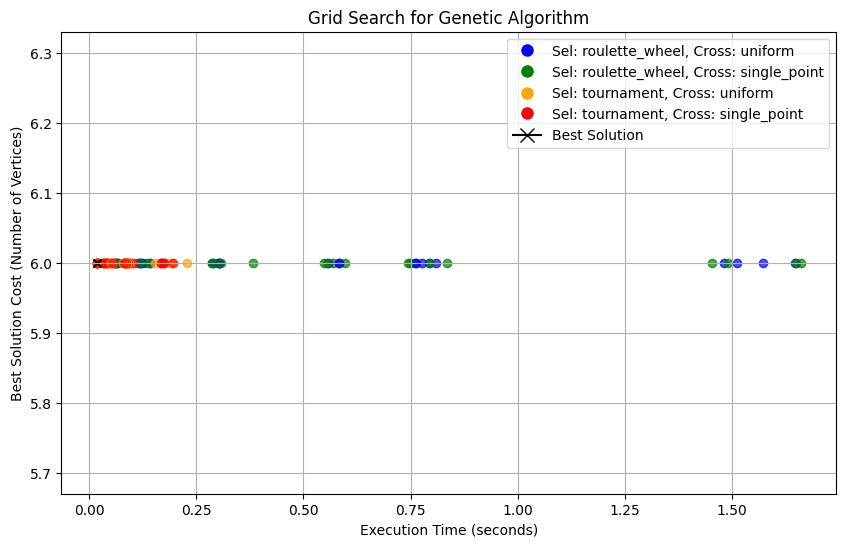

Best Parameters: {'population_size': 50, 'generations': 50, 'mutation_rate': 0.05, 'cross': 'single_point', 'selection': 'tournament', 'elitism_size_ratio': 0.1}
Best Cost: 6
Best Time: 0.0176 seconds
Graph: Graph with 10 nodes and 18 edges Minimum Vertex Cover found (renyi_graph_10_simulated_annealing): [True, True, True, False, True, False, True, False, False, True]
Number of Vertices in Cover: 6 Execution Time: 0.1725 seconds


Graph: Graph with 10 nodes and 18 edges Minimum Vertex Cover found (renyi_graph_10_vns): [False, True, False, True, True, False, True, True, False, True]
Number of Vertices in Cover: 6 Execution Time: 0.1787 seconds


SIM Vertex Cover found: 6 in 0.1725325584411621 seconds
VNS Vertex Cover found: 6 in 0.17873001098632812 seconds


In [151]:
G = nx.erdos_renyi_graph(10, 0.5)

param_grid = {
    'population_size' : [50, 100, 150],
    'generations' : [50, 100],
    'mutation_rate' : [0.01, 0.05],
    'elitism_size_ratio' : [0.05, 0.1],
    'cross' : ["uniform","single_point"],
    'selection' : ["roulette_wheel","tournament"]
}


best_params, best_cost, best_time = grid_search_ga("renyi_graph_10","genetic_algorithm",G, param_grid)
sim_cost, sim_time = evaluate(G,"sim","none","renyi_graph_10")
vns_cost, vns_time = evaluate(G,"vns","none","renyi_graph_10")
print(f"SIM Vertex Cover found: {sim_cost} in {sim_time} seconds")
print(f"VNS Vertex Cover found: {vns_cost} in {vns_time} seconds")


Evaluating with parameters: {'population_size': 100, 'generations': 50, 'mutation_rate': 0.01, 'elitism_size_ratio': 0.05, 'cross': 'uniform', 'selection': 'roulette_wheel'}
Graph: Graph with 20 nodes and 190 edges Minimum Vertex Cover found (Complete_20_genetic_algorithm): [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True]
Number of Vertices in Cover: 19 Execution Time: 1.0717 seconds


Evaluating with parameters: {'population_size': 100, 'generations': 50, 'mutation_rate': 0.01, 'elitism_size_ratio': 0.05, 'cross': 'uniform', 'selection': 'tournament'}
Graph: Graph with 20 nodes and 190 edges Minimum Vertex Cover found (Complete_20_genetic_algorithm): [True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Number of Vertices in Cover: 19 Execution Time: 0.1003 seconds


Evaluating with parameters: {'population_size': 100, 'generations': 50, 'mutatio

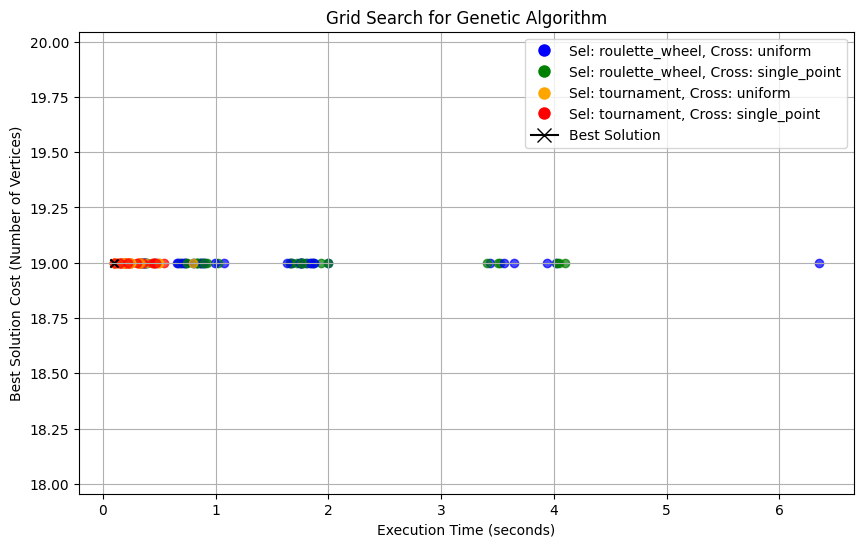

Best Parameters: {'population_size': 100, 'generations': 50, 'mutation_rate': 0.05, 'cross': 'single_point', 'selection': 'tournament', 'elitism_size_ratio': 0.05}
Best Cost: 19
Best Time: 0.0988 seconds
Graph: Graph with 20 nodes and 190 edges Minimum Vertex Cover found (Complete_20_simulated_annealing): [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False]
Number of Vertices in Cover: 19 Execution Time: 0.8276 seconds


Graph: Graph with 20 nodes and 190 edges Minimum Vertex Cover found (Complete_20_vns): [False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Number of Vertices in Cover: 19 Execution Time: 0.8240 seconds


SIM Vertex Cover found: 19 in 0.8275911808013916 seconds
VNS Vertex Cover found: 19 in 0.8239970207214355 seconds


In [152]:
G = nx.complete_graph(20)
param_grid = {
    'population_size' : [100, 150, 200],
    'generations' : [50, 100],
    'mutation_rate' : [0.01, 0.05,0.1],
    'elitism_size_ratio' : [0.05, 0.1],
    'cross' : ["uniform","single_point"],
    'selection' : ["roulette_wheel","tournament"]
}


best_params, best_cost, best_time = grid_search_ga("Complete_20","genetic_algorithm",G, param_grid)
sim_cost, sim_time = evaluate(G,"sim","none","Complete_20")
vns_cost, vns_time = evaluate(G,"vns","none","Complete_20")
print(f"SIM Vertex Cover found: {sim_cost} in {sim_time} seconds")
print(f"VNS Vertex Cover found: {vns_cost} in {vns_time} seconds")

Evaluating with parameters: {'population_size': 100, 'generations': 50, 'mutation_rate': 0.04, 'elitism_size_ratio': 0.05, 'cross': 'uniform', 'selection': 'roulette_wheel'}
Graph: Graph with 20 nodes and 94 edges Minimum Vertex Cover found (renyi_graph_20_genetic_algorithm): [False, True, True, False, True, True, False, True, True, False, True, True, True, True, True, False, True, True, True, True]
Number of Vertices in Cover: 15 Execution Time: 0.5964 seconds


Evaluating with parameters: {'population_size': 100, 'generations': 50, 'mutation_rate': 0.04, 'elitism_size_ratio': 0.05, 'cross': 'uniform', 'selection': 'tournament'}
Graph: Graph with 20 nodes and 94 edges Minimum Vertex Cover found (renyi_graph_20_genetic_algorithm): [True, True, False, True, False, True, True, False, True, True, True, True, True, False, True, True, True, True, False, True]
Number of Vertices in Cover: 15 Execution Time: 0.0975 seconds


Evaluating with parameters: {'population_size': 100, 'generations': 

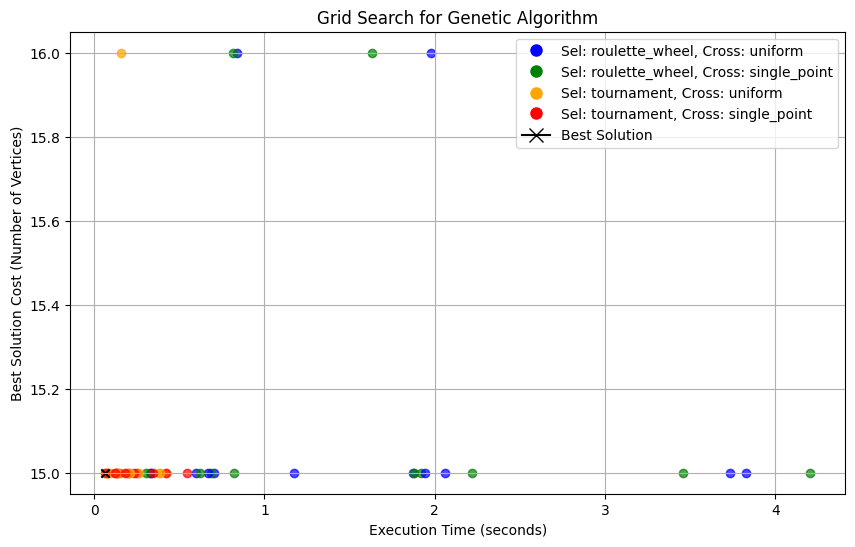

Best Parameters: {'population_size': 100, 'generations': 50, 'mutation_rate': 0.04, 'cross': 'single_point', 'selection': 'tournament', 'elitism_size_ratio': 0.1}
Best Cost: 15
Best Time: 0.0662 seconds
Graph: Graph with 20 nodes and 94 edges Minimum Vertex Cover found (renyi_graph_20_simulated_annealing): [False, True, True, False, False, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True]
Number of Vertices in Cover: 15 Execution Time: 0.4578 seconds


Graph: Graph with 20 nodes and 94 edges Minimum Vertex Cover found (renyi_graph_20_vns): [True, True, False, True, False, True, True, False, True, True, True, True, True, False, True, True, True, True, False, True]
Number of Vertices in Cover: 15 Execution Time: 0.6317 seconds


SIM Vertex Cover found: 15 in 0.45775675773620605 seconds
VNS Vertex Cover found: 15 in 0.6316866874694824 seconds


In [153]:
G = nx.erdos_renyi_graph(20, 0.5)
param_grid = {
    'population_size' : [100, 150, 200],
    'generations' : [50, 100],
    'mutation_rate' : [0.04],
    'elitism_size_ratio' : [0.05, 0.1],
    'cross' : ["uniform","single_point"],
    'selection' : ["roulette_wheel","tournament"]
}


best_params, best_cost, best_time = grid_search_ga("renyi_graph_20","genetic_algorithm",G, param_grid)
sim_cost, sim_time = evaluate(G,"sim","none","renyi_graph_20")
vns_cost, vns_time = evaluate(G,"vns","none","renyi_graph_20")
print(f"SIM Vertex Cover found: {sim_cost} in {sim_time} seconds")
print(f"VNS Vertex Cover found: {vns_cost} in {vns_time} seconds")

Evaluating with parameters: {'population_size': 100, 'generations': 50, 'mutation_rate': 0.04, 'elitism_size_ratio': 0.05, 'cross': 'uniform', 'selection': 'roulette_wheel'}
Graph: Graph with 30 nodes and 203 edges Minimum Vertex Cover found (renyi_graph_30_genetic_algorithm): [True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, False, False, True, True, True, True, True, True, True, False, True]
Number of Vertices in Cover: 25 Execution Time: 0.8793 seconds


Evaluating with parameters: {'population_size': 100, 'generations': 50, 'mutation_rate': 0.04, 'elitism_size_ratio': 0.05, 'cross': 'uniform', 'selection': 'tournament'}
Graph: Graph with 30 nodes and 203 edges Minimum Vertex Cover found (renyi_graph_30_genetic_algorithm): [True, False, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, False, True, True, True, False, True, True, False, True]
Number o

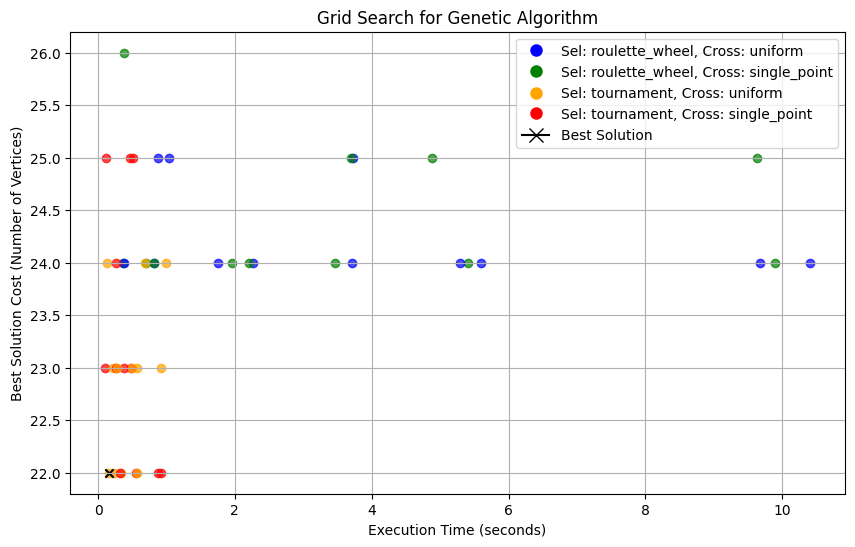

Best Parameters: {'population_size': 100, 'generations': 50, 'mutation_rate': 0.04, 'cross': 'uniform', 'selection': 'tournament', 'elitism_size_ratio': 0.05}
Best Cost: 22
Best Time: 0.1572 seconds
Graph: Graph with 30 nodes and 203 edges Minimum Vertex Cover found (renyi_graph_50_simulated_annealing): [True, False, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, False, True, True, True, False, True, True, False, True]
Number of Vertices in Cover: 22 Execution Time: 0.8336 seconds


Graph: Graph with 30 nodes and 203 edges Minimum Vertex Cover found (renyi_graph_50_vns): [True, False, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, False, True, True, True, False, True, True, False, True]
Number of Vertices in Cover: 22 Execution Time: 1.6604 seconds


SIM Vertex Cover found: 22 in 0.8336267471313477 seconds
VNS Vertex Cover found: 22 in 1.66038131

In [154]:
G = nx.erdos_renyi_graph(30, 0.5)
param_grid = {
    'population_size' : [100, 200,300],
    'generations' : [50,100],
    'mutation_rate' : [0.04],
    'elitism_size_ratio' : [0.05, 0.1],
    'cross' : ["uniform","single_point"],
    'selection' : ["roulette_wheel","tournament"]
}


best_params, best_cost, best_time = grid_search_ga("renyi_graph_30","genetic_algorithm",G, param_grid)
sim_cost, sim_time = evaluate(G,"sim","none","renyi_graph_50")
vns_cost, vns_time = evaluate(G,"vns","none","renyi_graph_50")
print(f"SIM Vertex Cover found: {sim_cost} in {sim_time} seconds")
print(f"VNS Vertex Cover found: {vns_cost} in {vns_time} seconds")

Evaluating with parameters: {'population_size': 400, 'generations': 100, 'mutation_rate': 0.04, 'elitism_size_ratio': 0.05, 'cross': 'uniform', 'selection': 'roulette_wheel'}
Graph: Graph with 200 nodes and 10033 edges Minimum Vertex Cover found (renyi_graph_200_genetic_algorithm): [True, False, False, False, False, True, False, False, True, False, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, False, False, True, True, False, True, True, True, True, True, False, False, True, True, True, False, False, True, True, False, True, True, False, True, True, True, True, False, True, True, False, True, False, False, False, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, False, False, False, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, False, True, True, Tru

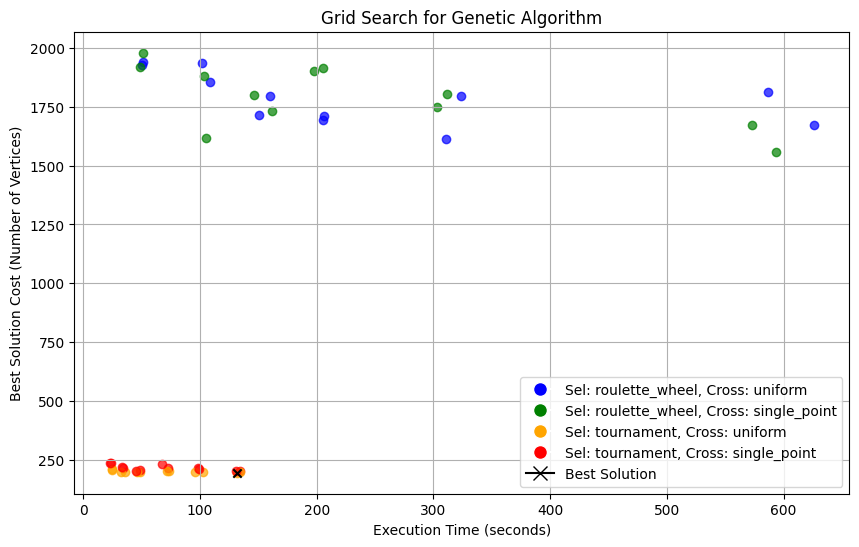

Best Parameters: {'population_size': 800, 'generations': 300, 'mutation_rate': 0.04, 'cross': 'uniform', 'selection': 'tournament', 'elitism_size_ratio': 0.05}
Best Cost: 195
Best Time: 131.4965 seconds
Graph: Graph with 200 nodes and 10033 edges Minimum Vertex Cover found (renyi_graph_200_simulated_annealing): [True, True, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, Tr

In [155]:
G = nx.erdos_renyi_graph(200, 0.5)
param_grid = {
    'population_size' : [400,600,800],
    'generations' : [100,300],
    'mutation_rate' : [ 0.04],
    'elitism_size_ratio' : [0.05, 0.1],
    'cross' : ["uniform","single_point"],
    'selection' : ["roulette_wheel","tournament"]
}


best_params, best_cost, best_time = grid_search_ga("renyi_graph_200","genetic_algorithm",G, param_grid)
sim_cost, sim_time = evaluate(G,"sim","none","renyi_graph_200")
vns_cost, vns_time = evaluate(G,"vns","none","renyi_graph_200")
print(f"SIM Vertex Cover found: {sim_cost} in {sim_time} seconds")
print(f"VNS Vertex Cover found: {vns_cost} in {vns_time} seconds")
#2hours